## HLA-zoo

To know:
- the alignment of each set of reads againts the graphs is done with `rules/alignment_simreads.smk`
- due to the large amount of graphs for the same set of sequences, paths to gfa are indexed and stored in a json file, their identifiers are used to label the `*.gaf` file with the alignment results 
- in each folder you will find a file `gfaid_to_path`, the information to track the source gfa is in that file

In [1]:
import sys
import json
from pathlib import Path
from tqdm import tqdm

# add parent folder to the path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd; tqdm.pandas()
import seaborn as sns
import matplotlib.pyplot as plt
from utils.load_gaf import load_gaf, ABBV

### reads 

In [2]:
numreads_by_seqid = {}
reads_stast=pd.read_csv("../simulated-reads-HLA-zoo/count_reads.tsv",sep="\t", header=None)
reads_stast.columns=["path_reads","count","seqsid"]
for record in reads_stast.to_records():
    seqid=record[-1]
    count=record[-2]
    numreads_by_seqid[seqid]=count
# 

In [3]:
reads_stast

,path_reads,count,seqsid
0,/data/pangeblocks-experiments/simulated-reads-...,171,A-3105
1,/data/pangeblocks-experiments/simulated-reads-...,167,B-3106
2,/data/pangeblocks-experiments/simulated-reads-...,169,C-3107
3,/data/pangeblocks-experiments/simulated-reads-...,225,DMA-3108
4,/data/pangeblocks-experiments/simulated-reads-...,322,DMB-3109
5,/data/pangeblocks-experiments/simulated-reads-...,272,DOA-3111
6,/data/pangeblocks-experiments/simulated-reads-...,214,DOB-3112
7,/data/pangeblocks-experiments/simulated-reads-...,811,DPA1-3113
8,/data/pangeblocks-experiments/simulated-reads-...,689,DPB1-3115
9,/data/pangeblocks-experiments/simulated-reads-...,865,DQA1-3117


Text(0.5, 1.0, 'HLA-zoo: Number of simulated reads for each set of sequences')

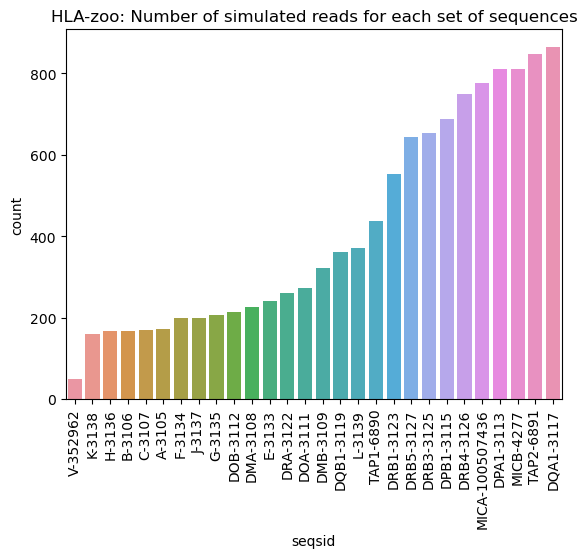

In [4]:
ax_numreads=sns.barplot(reads_stast.sort_values(by="count"), x="seqsid",y="count")
ax_numreads.tick_params(axis="x", rotation=90)
ax_numreads.set_title("HLA-zoo: Number of simulated reads for each set of sequences")

In [5]:
tool="makeprg"
aligner="graphaligner"
PATH_TOOL=Path(f"/data/pangeblocks-experiments/alignment-simulated-reads-HLA-zoo/{aligner}").joinpath(tool)

with open(Path(PATH_TOOL).joinpath("gfaid_to_paths.json")) as fp:
    gfaid_to_paths=json.load(fp)

In [6]:
path_gaf = list(Path(PATH_TOOL).rglob("*.gaf"))[0]
seqsid, gfaid, _ = path_gaf.stem.split(".")
gfaid = gfaid.replace("gfaid","")
path_gfa = "../"+ gfaid_to_paths[gfaid]

In [7]:
gaf = load_gaf(path_gaf=path_gaf, path_gfa=path_gfa, aligner=aligner)
gaf["seqsid"] = seqsid
gaf["tool"] = tool
gaf["gfa"] = path_gfa
gaf["aligner"] = aligner

In [8]:
gaf.head()

,query_seq_name,query_seq_len,query_start,query_end,strand_rel_path,path_matching,path_len,start_pos_path,end_pos_path,num_residue_matches,...,NM,AS,dv,id,cigar,num_alignment_subpath_gfa,seqsid,tool,gfa,aligner
0,gi|568815592:33075925-33089695_4682_4740_0_1_0...,150,0,150,+,>79>80>82,157,2,152,150,...,0,AS:f:150,dv:f:0,1.000000,cg:Z:150=,0,DPB1-3115,makeprg,../HLA-zoo-makeprg/output-HLA-zoo-mafft.op3-ep...,graphaligner
1,gi|568815592:33075925-33089695_8770_8806_0_1_0...,150,0,150,+,>312>313>314>318>319>321>322>324>325>327>328>330,186,31,181,150,...,0,AS:f:150,dv:f:0,1.000000,cg:Z:150=,0,DPB1-3115,makeprg,../HLA-zoo-makeprg/output-HLA-zoo-mafft.op3-ep...,graphaligner
2,gi|568815592:33075925-33089695_4627_4661_0_1_0...,150,0,150,+,>76>77>79>80>82,435,225,375,148,...,2,AS:f:144.12,dv:f:0.0133333,0.986667,cg:Z:8=1X24=1X116=,0,DPB1-3115,makeprg,../HLA-zoo-makeprg/output-HLA-zoo-mafft.op3-ep...,graphaligner
3,gi|568815592:33075925-33089695_7495_7521_0_1_0...,150,0,150,+,>207>208>210>211>213>214>216,254,56,206,145,...,5,AS:f:135.3,dv:f:0.0333333,0.966667,cg:Z:16=1X18=1X15=1X68=1X12=1X16=,0,DPB1-3115,makeprg,../HLA-zoo-makeprg/output-HLA-zoo-mafft.op3-ep...,graphaligner
4,gi|568815592:33075925-33089695_10960_10981_0_1...,150,0,150,+,>513>514>516>517>519>520>522>523>525>526>528,201,1,151,148,...,2,AS:f:144.12,dv:f:0.0133333,0.986667,cg:Z:55=1X52=1X41=,0,DPB1-3115,makeprg,../HLA-zoo-makeprg/output-HLA-zoo-mafft.op3-ep...,graphaligner


In [9]:
*_, mafft, _ = path_gfa.split("/")
mafft

'output-HLA-zoo-mafft.op3-ep0'

## Generic load

In [10]:
data_gafs_graphaligner = []
data_gafs_giraffe = []

for ALIGNER in ["giraffe","graphaligner"]:
    BASEPATH_ALIGN=Path(f"/data/pangeblocks-experiments/alignment-simulated-reads-HLA-zoo/{ALIGNER}")
    
    for TOOL in ["pangeblocks","pggb","PanPA","vg","makeprg"]:

        # load id to gfas
        with(open(BASEPATH_ALIGN.joinpath(TOOL) / "gfaid_to_paths.json" )) as fp: 
            gfaid_to_paths=json.load(fp)

        for path_gaf in tqdm(list(BASEPATH_ALIGN.joinpath(TOOL).rglob("*.gaf")), desc=f"{TOOL}-{ALIGNER}"):

            # load info related to the gfa
            seqsid, gfaid, _ = path_gaf.stem.split(".")
            gfaid = gfaid.replace("gfaid","")
            path_gfa =  "../" + gfaid_to_paths[gfaid]

            # 
            data_gaf = load_gaf(path_gaf=path_gaf, path_gfa=path_gfa, aligner=ALIGNER)
            data_gaf["seqsid"] = seqsid 
            data_gaf["tool"] = TOOL
            data_gaf["gfa"] = path_gfa
            data_gaf["aligner"] = ALIGNER

            if ALIGNER == "graphaligner":
                data_gafs_graphaligner.append(data_gaf)
            else:
                data_gafs_giraffe.append(data_gaf)

makeprg-graphaligner: 100%|██████████| 78/78 [00:00<00:00, 106.31it/s]


In [11]:
data_gafs_giraffe=pd.concat(data_gafs_giraffe, ignore_index=True)
data_gafs_graphaligner=pd.concat(data_gafs_graphaligner, ignore_index=True)

In [12]:
def get_id_plot(path_gfa):

    if "pangeblocks" in path_gfa:
        # loss function info
        *_,mafft,_,loss_func, pen_len,_ = path_gfa.split("/")
        
        op_ep = mafft.split("-mafft.")[-1]
        p, ml = pen_len.split("-")
        
        p=p.replace("penalization","p")
        ml=ml.replace("min_len","l")
        loss_func=loss_func[0]
        return "-".join(["pangeblocks","mafft",op_ep,loss_func,p,ml])
    
    if "pggb" in path_gfa:
        return "pggb"

    if "PanPA" in path_gfa:
        *_, mafft, _ = path_gfa.split("/")
        op_ep = mafft.split("-mafft.")[-1]
        return "-".join(["panpa","mafft",op_ep])

    if "vg" in path_gfa:
        *_, mafft, _ = path_gfa.split("/")
        op_ep = mafft.split("-mafft.")[-1]
        return "-".join(["vg","mafft",op_ep])

    if "makeprg" in path_gfa:
        *_, mafft, _ = path_gfa.split("/")
        op_ep = mafft.split("-mafft.")[-1]
        return "-".join(["makeprg","mafft",op_ep])

In [13]:
data_gafs_graphaligner["id_plot"] = data_gafs_graphaligner["gfa"].progress_apply(get_id_plot)
data_gafs_giraffe["id_plot"] = data_gafs_giraffe["gfa"].progress_apply(get_id_plot)

100%|██████████| 470796/470796 [00:00<00:00, 488476.30it/s]


In [14]:
data_gafs_graphaligner.head()

,query_seq_name,query_seq_len,query_start,query_end,strand_rel_path,path_matching,path_len,start_pos_path,end_pos_path,num_residue_matches,...,AS,dv,id,cigar,num_alignment_subpath_gfa,seqsid,tool,gfa,aligner,id_plot
0,gi|568815592:31353871-31357211_2446_2514_0_1_0...,150,0,150,+,>114>351>115>116>227>396>400>350>118>119>120>1...,158,6,156,148,...,AS:f:144.12,dv:f:0.0133333,0.986667,cg:Z:4=1X89=1X55=,1,B-3106,pangeblocks,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,graphaligner,pangeblocks-mafft-op3-ep0-s-p0-l0
1,gi|568815592:31353871-31357211_1300_1317_0_1_0...,150,0,150,+,>63>64>226>66>67>69>70>397>71>311>73>325,321,35,185,149,...,AS:f:147.06,dv:f:0.00666667,0.993333,cg:Z:107=1X42=,2,B-3106,pangeblocks,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,graphaligner,pangeblocks-mafft-op3-ep0-s-p0-l0
2,gi|568815592:31353871-31357211_1371_1395_0_1_0...,150,0,150,+,>70>397>71>311>73>325,220,5,155,150,...,AS:f:150,dv:f:0,1.000000,cg:Z:150=,4,B-3106,pangeblocks,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,graphaligner,pangeblocks-mafft-op3-ep0-s-p0-l0
3,gi|568815592:31353871-31357211_146_180_0_1_0_0...,150,0,150,+,>361>286>4>277>278>5>248>303>8>274>10>390>11>1...,275,107,257,150,...,AS:f:150,dv:f:0,1.000000,cg:Z:150=,2,B-3106,pangeblocks,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,graphaligner,pangeblocks-mafft-op3-ep0-s-p0-l0
4,gi|568815592:31353871-31357211_2514_2547_0_1_0...,150,0,150,+,>121>123>124>389>416>126>258>128>358>129>446>4...,193,6,156,148,...,AS:f:144.12,dv:f:0.0133333,0.986667,cg:Z:70=1X65=1X13=,1,B-3106,pangeblocks,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,graphaligner,pangeblocks-mafft-op3-ep0-s-p0-l0


In [15]:
data_gafs_giraffe.head()

,query_seq_name,query_seq_len,query_start,query_end,strand_rel_path,path_matching,path_len,start_pos_path,end_pos_path,num_residue_matches,...,bq,cs,dv,id,num_alignment_subpath_gfa,seqsid,tool,gfa,aligner,id_plot
0,gi|568815592:31494880-31511123_6139_6171_0_1_0...,150,0,150,+,>785>786>787>811>557>558>559,171,8,157,147,...,bq:Z:64665475655855744666557554565554617552537...,cs:Z::11*TA:117*TG:13*AT:6,dv:f:0.02,0.980000,0,MICB-4277,pangeblocks,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,giraffe,pangeblocks-mafft-op3-ep0-w-p3-l3
1,gi|568815592:31494880-31511123_6774_6780_0_1_0...,150,0,150,+,>39>40>41>650>42>43>44,186,28,177,148,...,bq:Z:5651725847655458655;858663485555365565756...,cs:Z::89*AC:40*TC:19,dv:f:0.0133,0.986667,0,MICB-4277,pangeblocks,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,giraffe,pangeblocks-mafft-op3-ep0-w-p3-l3
2,gi|568815592:31494880-31511123_9669_9712_0_1_0...,150,0,150,+,>984>255>1056>732>155>856>332>333>578>774>775>...,183,16,165,148,...,bq:Z:84647441612776675654537555463635949648667...,cs:Z::61*TC:64*CA:23,dv:f:0.0133,0.986667,0,MICB-4277,pangeblocks,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,giraffe,pangeblocks-mafft-op3-ep0-w-p3-l3
3,gi|568815592:31494880-31511123_7155_7160_0_1_0...,150,0,150,+,>442>443>444>445>996>1032,159,4,153,150,...,bq:Z:45854753666668758665455545565754757845557...,cs:Z::150,dv:f:0,1.000000,0,MICB-4277,pangeblocks,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,giraffe,pangeblocks-mafft-op3-ep0-w-p3-l3
4,gi|568815592:31494880-31511123_9412_9413_0_1_0...,150,0,150,+,>724>725>651>1030>827>912>511>479>60>415>424>61,161,3,152,149,...,bq:Z:5275756554647685:456536864555456645756745...,cs:Z::46*GC:103,dv:f:0.0067,0.993333,0,MICB-4277,pangeblocks,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,giraffe,pangeblocks-mafft-op3-ep0-w-p3-l3


In [16]:
common_cols=["id","id_plot","tool","aligner","mapping_quality","num_alignment_subpath_gfa", "gfa", "seqsid", "query_seq_name"]
data_gafs = pd.concat([data_gafs_giraffe[common_cols].copy(), data_gafs_graphaligner[common_cols].copy()],axis=0)


In [17]:
data_gafs["tool-aligner"]=data_gafs.progress_apply(lambda row: row["tool"]+"-"+row["aligner"], axis=1)
data_gafs.head()

100%|██████████| 940124/940124 [00:09<00:00, 102475.33it/s]


,id,id_plot,tool,aligner,mapping_quality,num_alignment_subpath_gfa,gfa,seqsid,query_seq_name,tool-aligner
0,0.980000,pangeblocks-mafft-op3-ep0-w-p3-l3,pangeblocks,giraffe,60,0,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,MICB-4277,gi|568815592:31494880-31511123_6139_6171_0_1_0...,pangeblocks-giraffe
1,0.986667,pangeblocks-mafft-op3-ep0-w-p3-l3,pangeblocks,giraffe,60,0,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,MICB-4277,gi|568815592:31494880-31511123_6774_6780_0_1_0...,pangeblocks-giraffe
2,0.986667,pangeblocks-mafft-op3-ep0-w-p3-l3,pangeblocks,giraffe,59,0,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,MICB-4277,gi|568815592:31494880-31511123_9669_9712_0_1_0...,pangeblocks-giraffe
3,1.000000,pangeblocks-mafft-op3-ep0-w-p3-l3,pangeblocks,giraffe,60,0,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,MICB-4277,gi|568815592:31494880-31511123_7155_7160_0_1_0...,pangeblocks-giraffe
4,0.993333,pangeblocks-mafft-op3-ep0-w-p3-l3,pangeblocks,giraffe,60,0,../HLA-zoo-pangeblocks/output-HLA-zoo-mafft.op...,MICB-4277,gi|568815592:31494880-31511123_9412_9413_0_1_0...,pangeblocks-giraffe


In [18]:
iter_seqsid=iter(data_gafs["seqsid"].unique())

___
## Plots for one gene

In [35]:
seqid= next(iter_seqsid); print(seqid)
# seqid="DMA-3108"
# seqid="A-3105"
seqid="J-3137"
threshold_mapping_quality = 0

data_plot = data_gafs.query(f"seqsid=='{seqid}' and mapping_quality>{threshold_mapping_quality}")
order_labels = sorted(list(data_plot["id_plot"].unique()))


DMB-3109


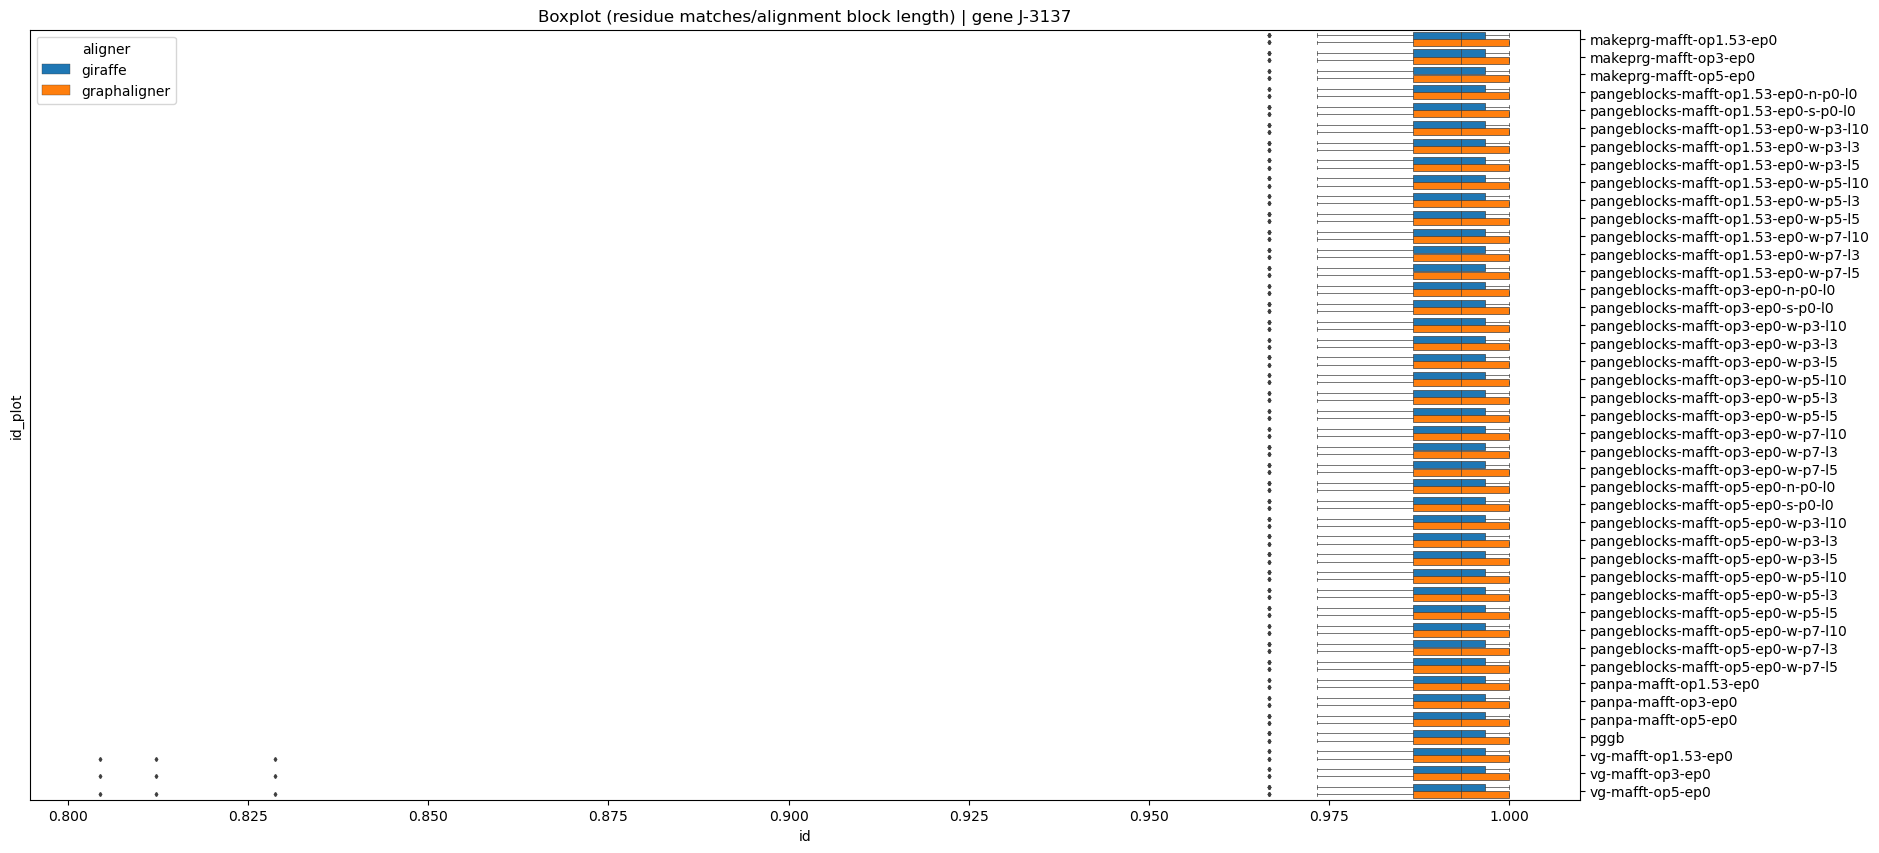

In [36]:
plt.figure(figsize=(20,10))
ax_boxplot = sns.boxplot(
    data=data_plot, 
    x="id",
    y="id_plot",
    orient="h",
    hue="aligner",
    order=order_labels,
    saturation=1,
    linewidth=0.5,
    fliersize=2.0,
    )
ax_boxplot.set_title(f"Boxplot (residue matches/alignment block length) | gene {seqid}")
ax_boxplot.yaxis.tick_right()

Text(0.5, 1.0, 'Number of aligned reads | gene J-3137')

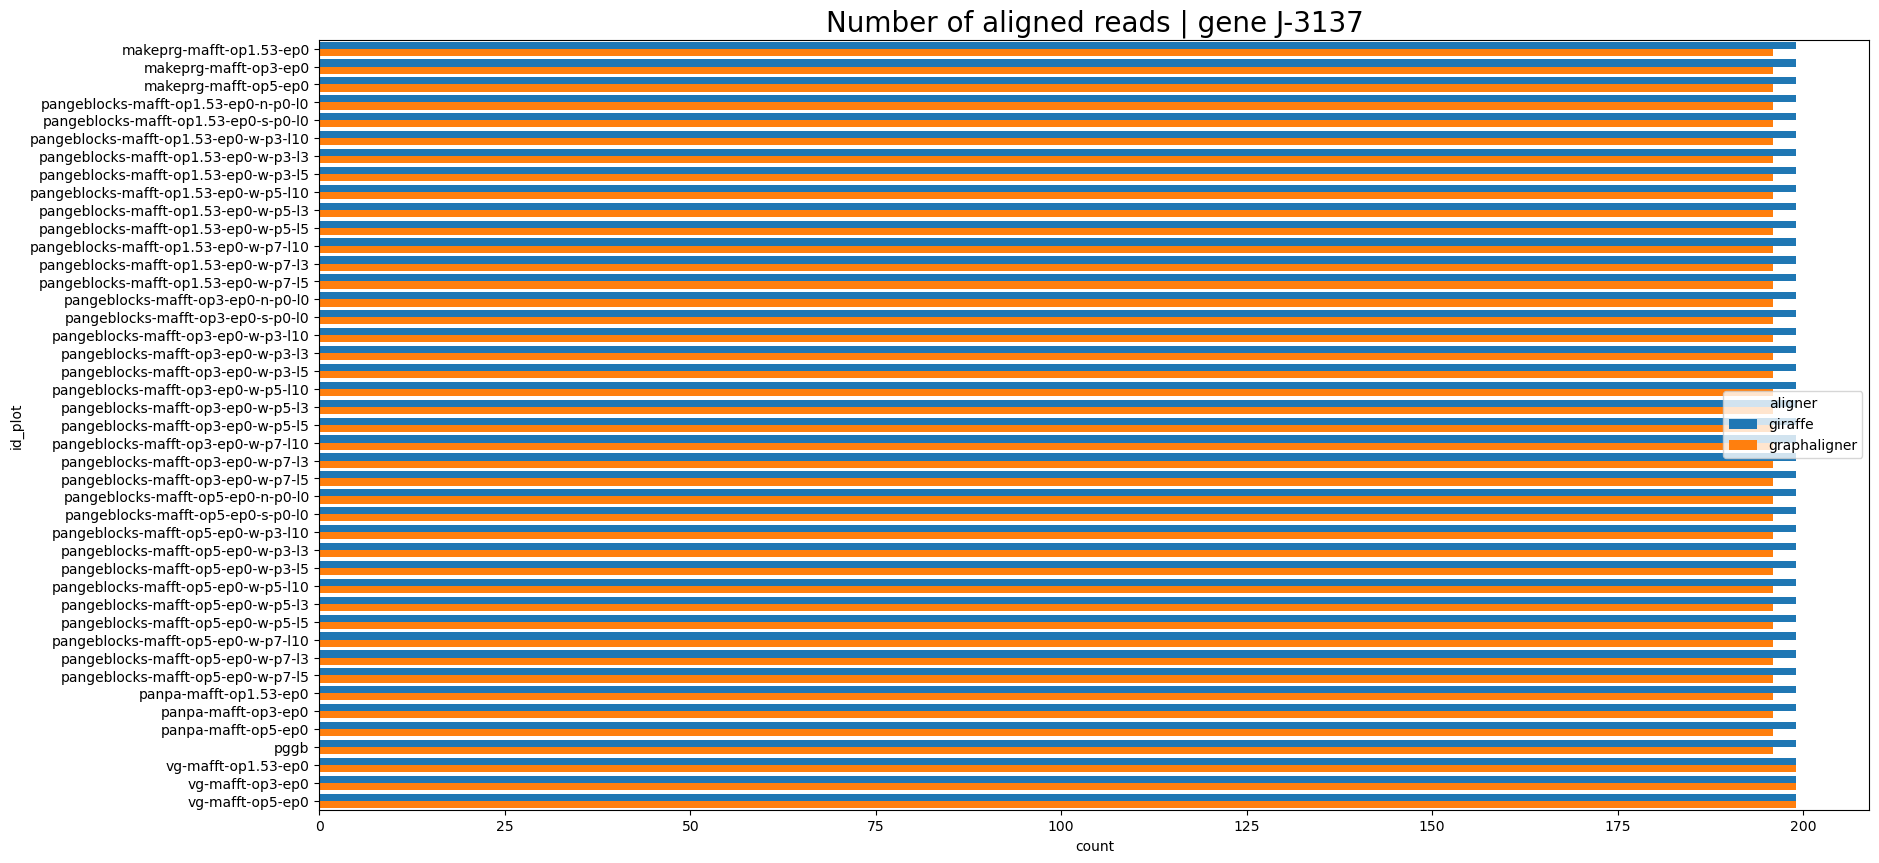

In [37]:
plt.figure(figsize=(20,10))
ax_count=sns.countplot(
    data=data_plot, 
    y="id_plot", 
    hue="aligner", 
    orient="h", 
    order=order_labels,
    # palette=("orange","blue"),
    saturation=1,
    # saturation=1,
    linewidth=0.5,
    )
ax_count.set_title(f"Number of aligned reads | gene {seqid}", size=20)


Text(0.5, 1.0, '% of aligned reads | gene J-3137')

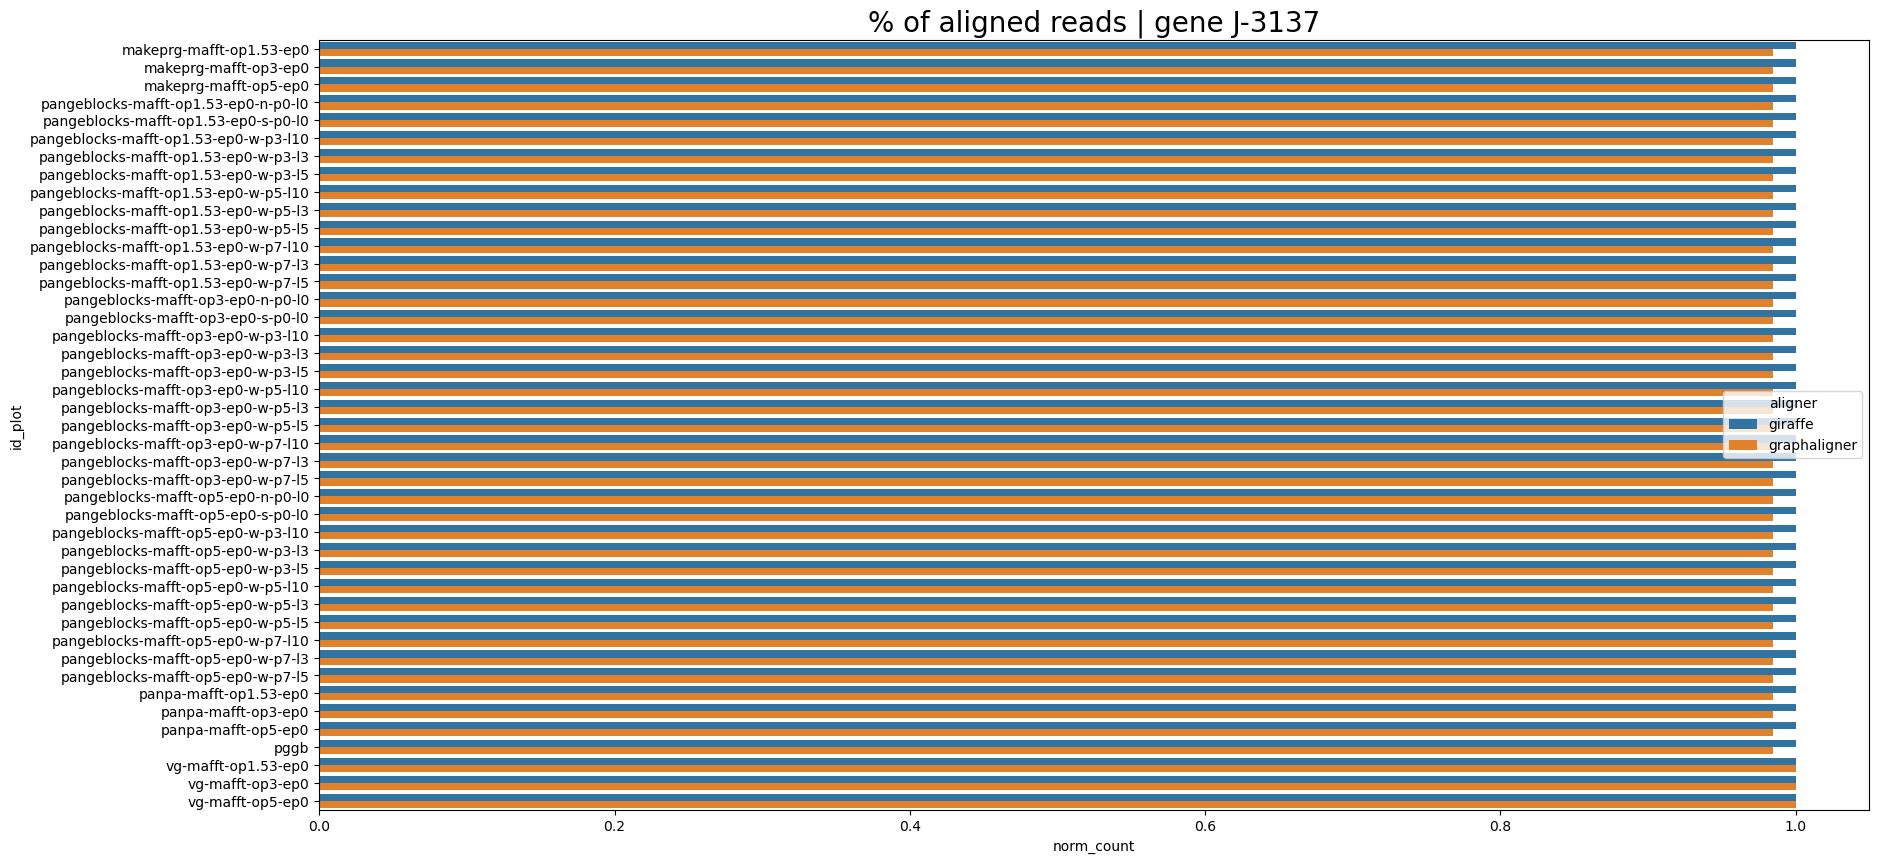

In [38]:
norm_counts=data_plot.groupby(["id_plot","aligner"]).size() / numreads_by_seqid[seqid]
norm_counts=norm_counts.reset_index()
norm_counts.rename({0:"norm_count"},axis=1,inplace=True)

plt.figure(figsize=(20,10))
ax_count=sns.barplot(
    data=norm_counts, 
    y="id_plot", 
    x="norm_count",
    hue="aligner", 
    orient="h", 
    order=order_labels
    )
ax_count.set_title(f"% of aligned reads | gene {seqid}", size=20)

In [39]:
# # sns.set_context("paper", )
# ax_align_subpaths = sns.displot(
#     data=data_plot,
#     col="id_plot",
#     x="num_alignment_subpath_gfa",
#     hue="aligner",
#     col_wrap=8,
#     facet_kws=dict(sharex=False),
#     # height=3
# )

# ax_count.set_title(f"Number of existing paths the reads are aligned against | gene {seqid} ")
# # ax_count.fig.set_size_inches(10,10)

___
## Jacard distance between set of aligned reads

**Jaccard index / similarity**
$$J(A,B) = \dfrac{|A \cap B|}{|A \cup B|}$$

**Jaccard distance / disimilarity**
$$1-J(A,B)$$

use own distance matrix with clustermap https://stackoverflow.com/questions/38705359/how-to-give-sns-clustermap-a-precomputed-distance-matrix

In [40]:
import numpy as np 
import scipy.spatial as sp
import scipy.cluster.hierarchy as hc 

def jaccard_index(A:set, B:set):
    return len(A.intersection(B))/len(A.union(B))

def compute_distance_matrix(readsid: dict[list], return_jaccard_index=False):
    "compute matrix of Jacard distances for all tuples of keys in the input dict"
    
    keys=list(readsid.keys())
    keys.sort()
    n=len(keys)
    order={key: idx for idx, key in enumerate(keys)} # to store values in the matrix
    distance_matrix=np.zeros((n,n))

    # avoid double for loop, compute upper triangle and then sum trasposed matrix
    for k1 in keys:
        for k2 in keys: 
            if k1 != k2:
                A=set(readsid[k1])
                B=set(readsid[k2])
                distance_matrix[order[k1],order[k2]] = jaccard_index(A,B)
    jaccard_matrix = distance_matrix #+ distance_matrix.T 
    if return_jaccard_index is True:
        return jaccard_matrix, order

    distance_matrix = 1 - jaccard_matrix
    
    # make sure the diagonal is 0
    for i in range(distance_matrix.shape[0]):
        distance_matrix[i,i] = 0
    return distance_matrix, order


Text(0.5, 1.05, 'reads aligned with graphaligner | Each item represents a set aligned to a graph')

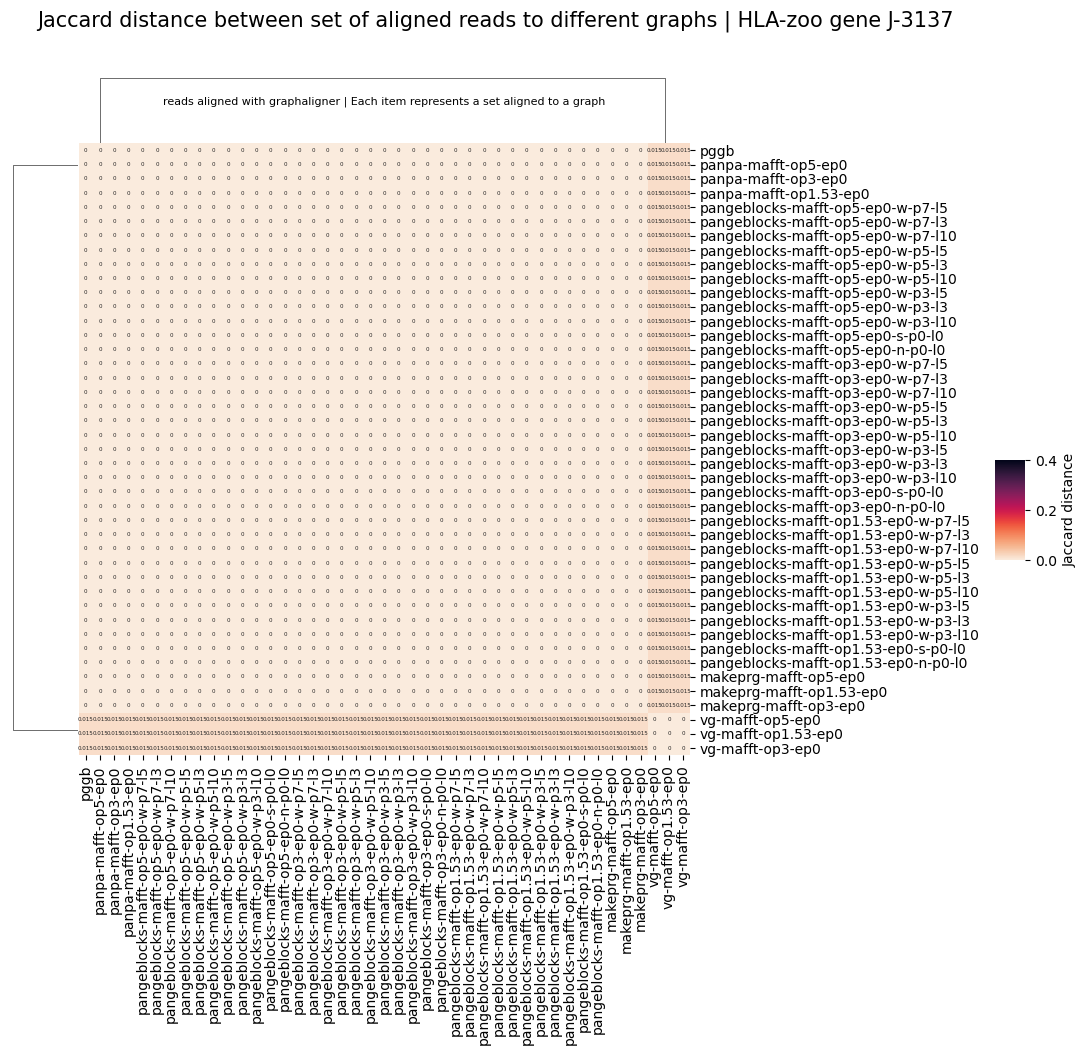

In [41]:
readsid=dict()

ALIGNER="graphaligner" # "giraffe"
data_plot_aligner=data_plot.query(f"aligner=='{ALIGNER}'").copy()
keys=data_plot_aligner.id_plot.unique()
for key in keys:
    readsid[key]=data_plot_aligner.query(f"id_plot=='{key}'")["query_seq_name"].tolist()

distance_matrix, order = compute_distance_matrix(readsid)
idx2key={idx:key for key,idx in order.items()}
keys=[idx2key[idx] for idx in range(len(order))]

linkage = hc.linkage(sp.distance.squareform(distance_matrix), method='average')

g=sns.clustermap(
                pd.DataFrame(distance_matrix, index=keys, columns=keys), 
                row_linkage=linkage, col_linkage=linkage, 
                annot=True, annot_kws={"size": 4},
                cmap="rocket_r",
                vmin=0, vmax=0.4, figsize=(10,10), 
                cbar_pos=(1, 0.5, .03, .1),
                dendrogram_ratio=(.1, .1),
                cbar_kws={"label": "Jaccard Distance"}
                )
g.ax_cbar.set_ylabel("Jaccard distance",)
g.fig.suptitle(f"Jaccard distance between set of aligned reads to different graphs | HLA-zoo gene {seqid}",y=1.05, size=15)
g.ax_heatmap.set_title(f"reads aligned with {ALIGNER} | Each item represents a set aligned to a graph", size=8, y=1.05)

/opt/mambaforge/envs/plots/lib/python3.11/site-packages/seaborn/matrix.py:615: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)
/opt/mambaforge/envs/plots/lib/python3.11/site-packages/seaborn/matrix.py:623: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


Text(0.5, 1.05, 'reads aligned with giraffe | Each item represents a set aligned to a graph')

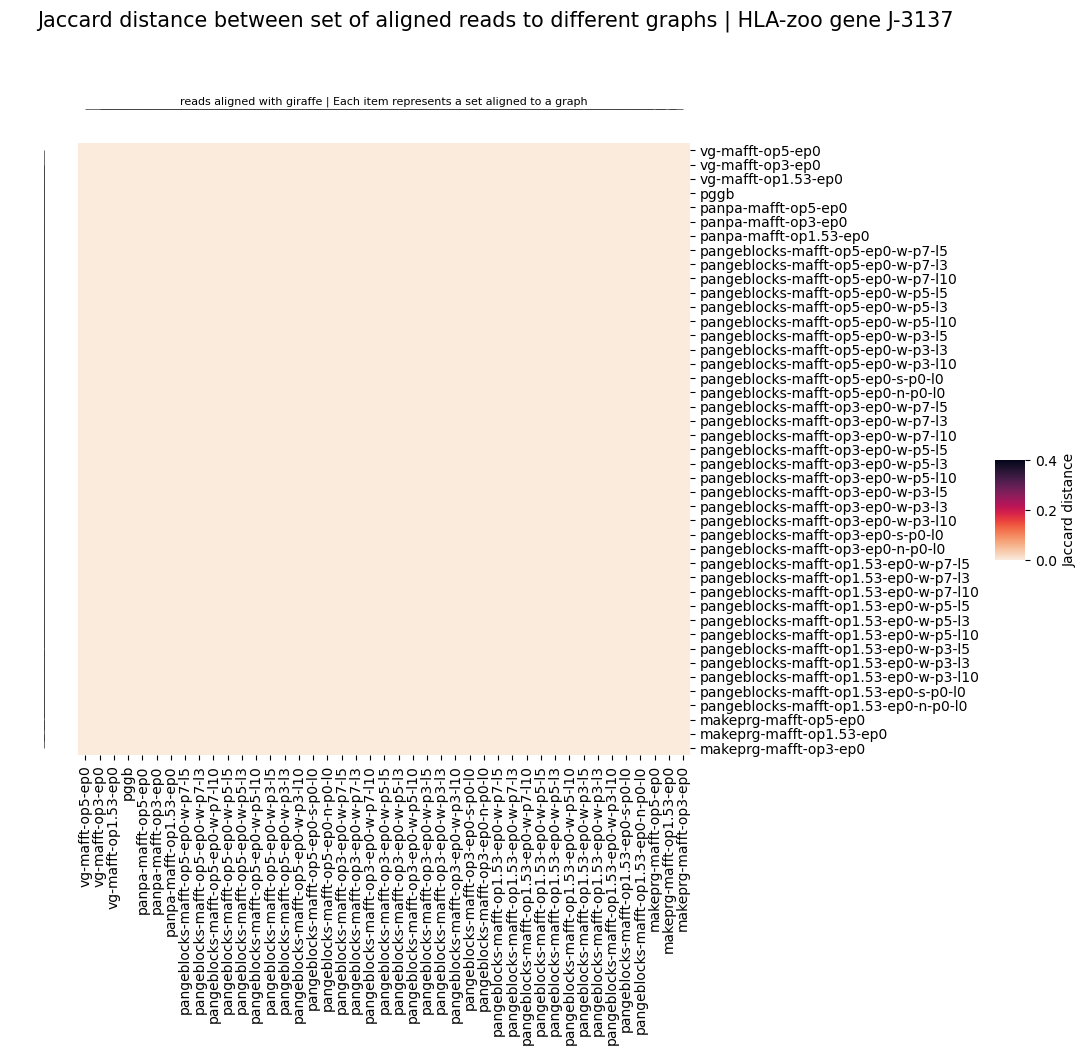

In [42]:
ALIGNER="giraffe"
data_plot_aligner=data_plot.query(f"aligner=='{ALIGNER}'").copy()
keys=data_plot_aligner.id_plot.unique()
for key in keys:
    readsid[key]=data_plot_aligner.query(f"id_plot=='{key}'")["query_seq_name"].tolist()

distance_matrix, order = compute_distance_matrix(readsid)
idx2key={idx:key for key,idx in order.items()}
keys=[idx2key[idx] for idx in range(len(order))]

linkage = hc.linkage(sp.distance.squareform(distance_matrix), method='average')

g=sns.clustermap(
                pd.DataFrame(distance_matrix, index=keys, columns=keys), 
                row_linkage=linkage, col_linkage=linkage, 
                # annot=True, annot_kws={"size": 6},
                cmap="rocket_r",
                vmin=0, vmax=0.4, figsize=(10,10), 
                cbar_pos=(1, 0.5, .03, .1),
                dendrogram_ratio=(.1, .1),
                cbar_kws={"label": "Jaccard Distance"}
                )
g.ax_cbar.set_ylabel("Jaccard distance",)
g.fig.suptitle(f"Jaccard distance between set of aligned reads to different graphs | HLA-zoo gene {seqid}",y=1.05, size=15)
g.ax_heatmap.set_title(f"reads aligned with {ALIGNER} | Each item represents a set aligned to a graph", size=8, y=1.05)

___
### Weighted alignment id score

TODO: series to dataframe and use seaborn to highlight by tool

In [43]:
n_reads

272

In [85]:
print(seqid)
n_reads=numreads_by_seqid[seqid]
weighted_id=data_plot.groupby(["aligner","tool","id_plot"])["id"].agg([
                                                                    ("id_score", lambda x: sum(x)/n_reads), 
                                                                    ("id_max", "max"),
                                                                    ("id_min", "min"),
                                                                    ("id_std", "std"),
                                                                    ("aligned_reads", "count"),
                                                                    ("sim_reads", lambda x: n_reads),
                                                                    ("extra_alignments", lambda x: len(x)-n_reads if len(x)-n_reads>0 else 0 )
                                                                    ])#.reset_index()


J-3137


In [86]:
weighted_id

id_score  id_max  \
aligner      tool        id_plot                                               
giraffe      PanPA       panpa-mafft-op1.53-ep0             0.990687     1.0   
                         panpa-mafft-op3-ep0                0.990687     1.0   
                         panpa-mafft-op5-ep0                0.990653     1.0   
             makeprg     makeprg-mafft-op1.53-ep0           0.990653     1.0   
                         makeprg-mafft-op3-ep0              0.990653     1.0   
...                                                              ...     ...   
graphaligner pangeblocks pangeblocks-mafft-op5-ep0-w-p7-l5  0.975843     1.0   
             pggb        pggb                               0.975876     1.0   
             vg          vg-mafft-op1.53-ep0                0.988266     1.0   
                         vg-mafft-op3-ep0                   0.988266     1.0   
                         vg-mafft-op5-ep0                   0.988233     1.0   

                                                              id_min  \
aligner      tool        id_plot                                       
giraffe      PanPA       panpa-mafft-op1.53-ep0             0.966667   
                         panpa-mafft-op3-ep0                0.966667   
                         panpa-mafft-op5-ep0                0.966667   
             makeprg     makeprg-mafft-op1.53-ep0           0.966667   
                         makeprg-mafft-op3-ep0              0.966667   
...                                                              ...   
graphaligner pangeblocks pangeblocks-mafft-op5-ep0-w-p7-l5  0.966667   
             pggb        pggb                               0.966667   
             vg          vg-mafft-op1.53-ep0                0.804469   
                         vg-mafft-op3-ep0                   0.804469   
                         vg-mafft-op5-ep0                   0.804469   

                                                              id_std  \
aligner      tool        id_plot                                       
giraffe      PanPA       panpa-mafft-op1.53-ep0             0.007809   
                         panpa-mafft-op3-ep0                0.007809   
                         panpa-mafft-op5-ep0                0.007897   
             makeprg     makeprg-mafft-op1.53-ep0           0.007897   
                         makeprg-mafft-op3-ep0              0.007897   
...                                                              ...   
graphaligner pangeblocks pangeblocks-mafft-op5-ep0-w-p7-l5  0.007734   
             pggb        pggb                               0.007731   
             vg          vg-mafft-op1.53-ep0                0.022835   
                         vg-mafft-op3-ep0                   0.022835   
                         vg-mafft-op5-ep0                   0.022832   

                                                            aligned_reads  \
aligner      tool        id_plot                                            
giraffe      PanPA       panpa-mafft-op1.53-ep0                       199   
                         panpa-mafft-op3-ep0                          199   
                         panpa-mafft-op5-ep0                          199   
             makeprg     makeprg-mafft-op1.53-ep0                     199   
                         makeprg-mafft-op3-ep0                        199   
...                                                                   ...   
graphaligner pangeblocks pangeblocks-mafft-op5-ep0-w-p7-l5            196   
             pggb        pggb                                         196   
             vg          vg-mafft-op1.53-ep0                          199   
                         vg-mafft-op3-ep0                             199   
                         vg-mafft-op5-ep0                             199   

                                                            sim_reads  \
aligner      tool        id_plot                                      

Text(0.5, 1.0, 'Weighted ID score | graphaligner | gene J-3137')

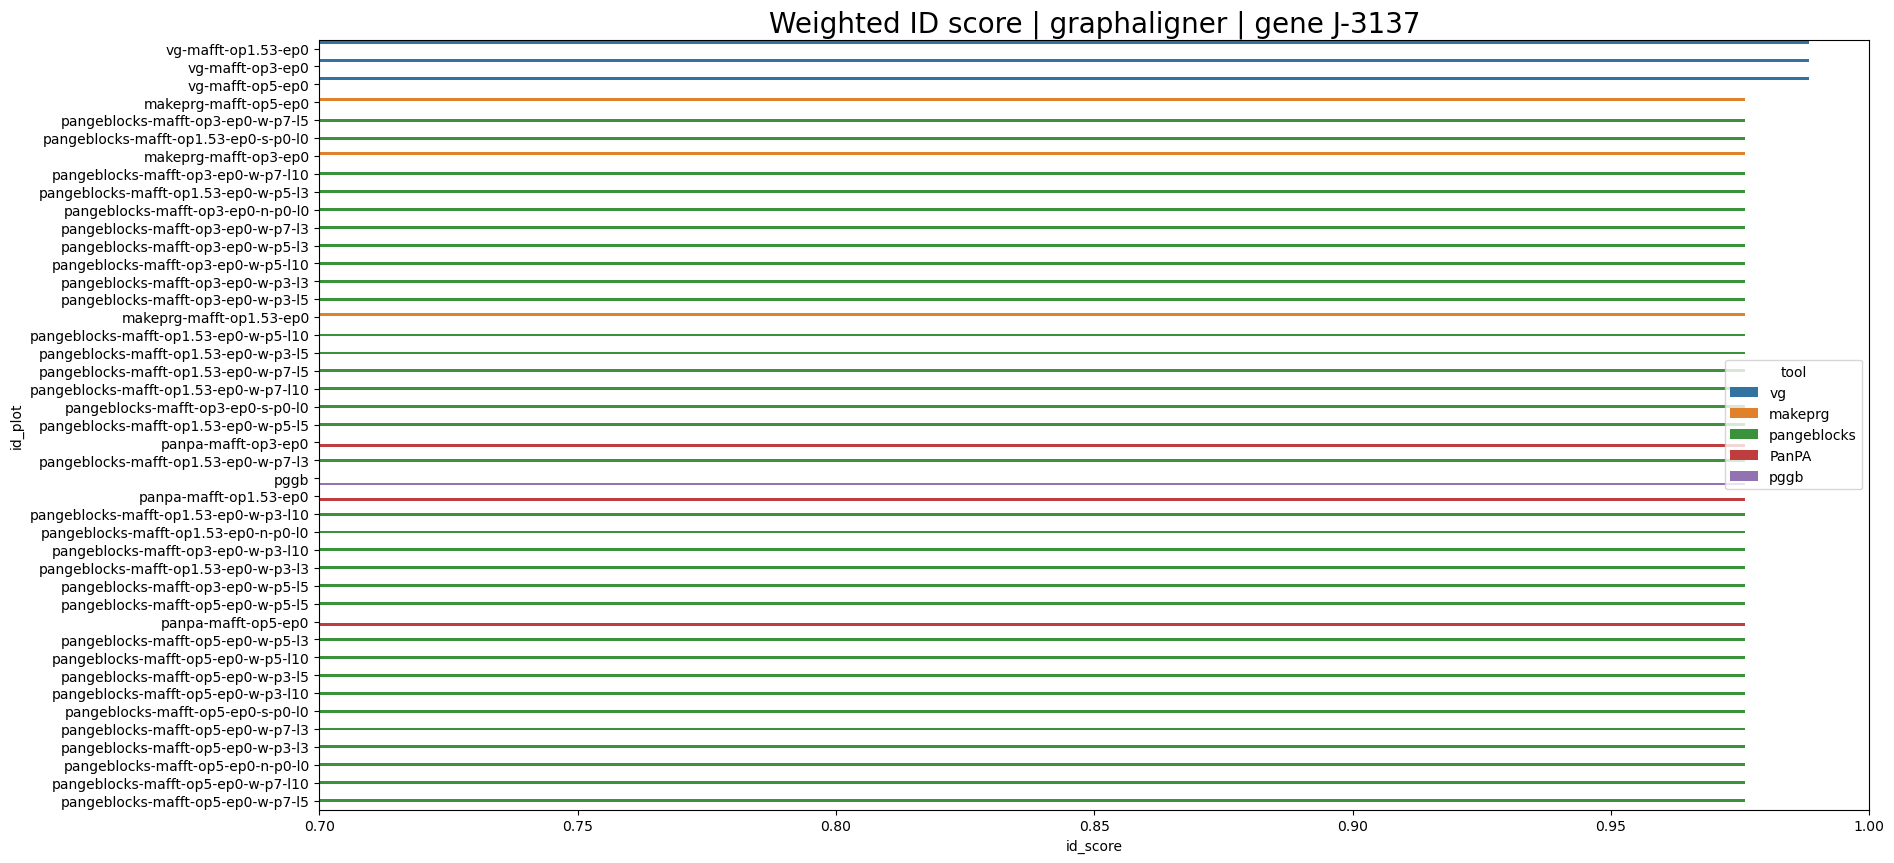

In [76]:
norm_id=weighted_id[weighted_id.index.get_level_values("aligner").isin(["graphaligner"])].sort_values(by="id_score", ascending=False).reset_index()
plt.figure(figsize=(20,10))
ax_norm_id=sns.barplot(
    data=norm_id, 
    y="id_plot", 
    x="id_score",
    hue="tool", 
    orient="h", 
)
ax_norm_id.set_xlim(0.7,1.0)
ax_norm_id.set_title(f"Weighted ID score | graphaligner | gene {seqid}", size=20)

Text(0.5, 1.0, 'Weighted ID score | giraffe | gene J-3137')

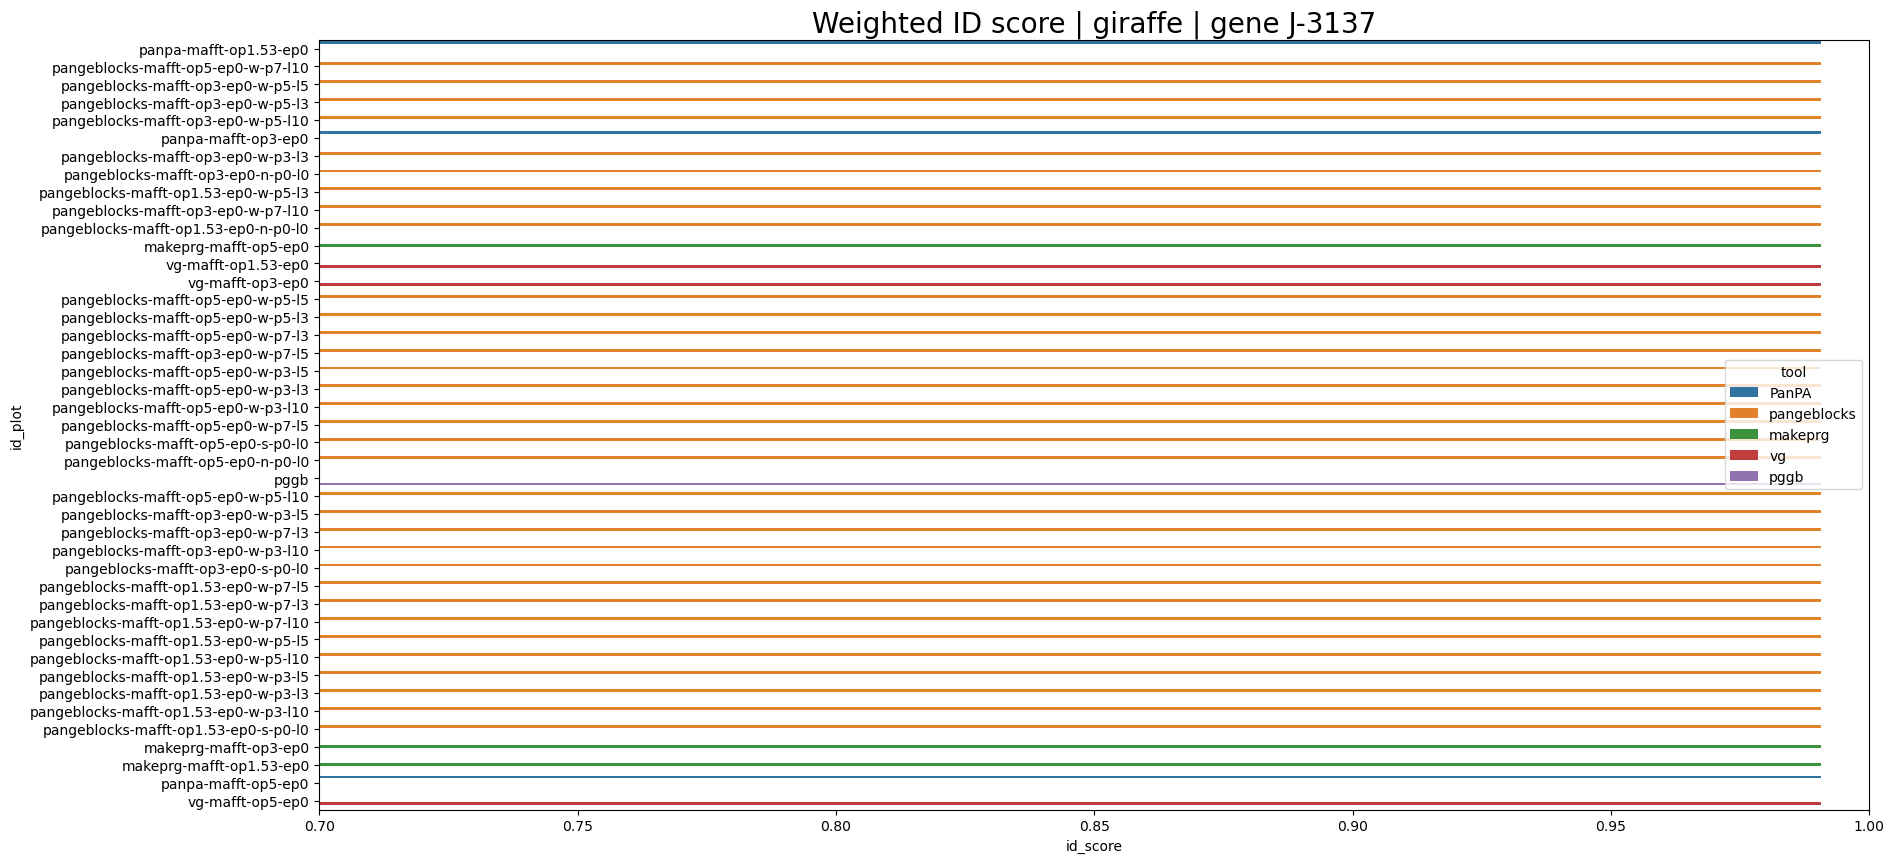

In [77]:
norm_id=weighted_id[weighted_id.index.get_level_values("aligner").isin(["giraffe"])].sort_values(by="id_score",ascending=False).reset_index()
plt.figure(figsize=(20,10))
ax_norm_id=sns.barplot(
    data=norm_id, 
    y="id_plot", 
    x="id_score",
    hue="tool", 
    orient="h", 
)
ax_norm_id.set_xlim(0.7,1.0)
ax_norm_id.set_title(f"Weighted ID score | giraffe | gene {seqid}", size=20)

In [ ]:
top1=norm_id.iloc[0]["id_plot"]
top2=norm_id.iloc[1]["id_plot"]
top3=norm_id.iloc[2]["id_plot"]
set(readsid[top1])-set(readsid[top2]), set(readsid[top1])-set(readsid[top3]), set(readsid[top2])-set(readsid[top3])

(set(), set(), set())

___

In [157]:
seqsid=data_gafs["seqsid"].unique()

seqid="A-3105"
aligner="giraffe"

n_reads=numreads_by_seqid[seqid]
weighted_id=data_gafs.groupby(["seqsid","aligner","tool","id_plot"])["id"].agg([
                                                                    ("cum_id_score", lambda x: sum(x)), #numreads_by_seqid[x.name[0]]), 
                                                                    ("rowname", lambda x: x.name),
                                                                    ("id_max", "max"),
                                                                    ("id_min", "min"),
                                                                    ("id_std", "std"),
                                                                    ("aligned_reads", "count"),
                                                                    ("sim_reads", lambda x: n_reads),
                                                                    ("extra_alignments", lambda x: len(x)-n_reads if len(x)-n_reads>0 else 0 )
                                                                    ])#.reset_index()

In [166]:
# weighted score (here because idk how to access with lamba in the agg function, since column 'rowname' is different from what is excepted)
weighted_id["id_score"]=weighted_id.apply(lambda row: row["cum_id_score"] / numreads_by_seqid[row.name[0]], axis=1)

In [167]:
# all graphs that reach the maximum id score
max_id_score=weighted_id.groupby(["seqsid","aligner"])["id_score"].agg([("max","max")]).reset_index()
max_id_score

,seqsid,aligner,max
0,A-3105,giraffe,0.990565
1,A-3105,graphaligner,1.341057
2,B-3106,giraffe,0.990259
3,B-3106,graphaligner,0.962044
4,C-3107,giraffe,0.990296
5,C-3107,graphaligner,0.956893
6,DMA-3108,giraffe,0.990074
7,DMA-3108,graphaligner,0.985981
8,DMB-3109,giraffe,0.990393
9,DMB-3109,graphaligner,0.977508


In [217]:
from collections import namedtuple
list_bg=[]
best_graphs = namedtuple("BestGraphs",["seqid","aligner","graphs"])
tools_opt = lambda seqid, max_score, aligner, by: set(weighted_id.reset_index().query(f"seqsid=='{seqid}' and `id_score`>={max_score} and aligner=='{aligner}'")[by].tolist())
for aligner in ["giraffe", "graphaligner"]:
    for seqid in seqsid:
        max_score = max_id_score.query(f"seqsid=='{seqid}' and aligner=='{aligner}'")["max"].item()
        graphs = tools_opt(seqid, max_score, aligner, by="tool")
        graphs = list(graphs)
        graphs.sort()

        list_bg.append(
            best_graphs(seqid, aligner, graphs)
        )
df_best_graphs = pd.DataFrame(list_bg)
df_best_graphs.sort_values(by=["seqid","aligner"])

,seqid,aligner,graphs
16,A-3105,giraffe,"[pangeblocks, pggb]"
44,A-3105,graphaligner,[pangeblocks]
4,B-3106,giraffe,[pangeblocks]
32,B-3106,graphaligner,[makeprg]
15,C-3107,giraffe,"[makeprg, pangeblocks]"
43,C-3107,graphaligner,[makeprg]
3,DMA-3108,giraffe,"[PanPA, makeprg, pangeblocks, pggb, vg]"
31,DMA-3108,graphaligner,[pangeblocks]
1,DMB-3109,giraffe,"[PanPA, makeprg, pangeblocks, pggb, vg]"
29,DMB-3109,graphaligner,[vg]


<Axes: >

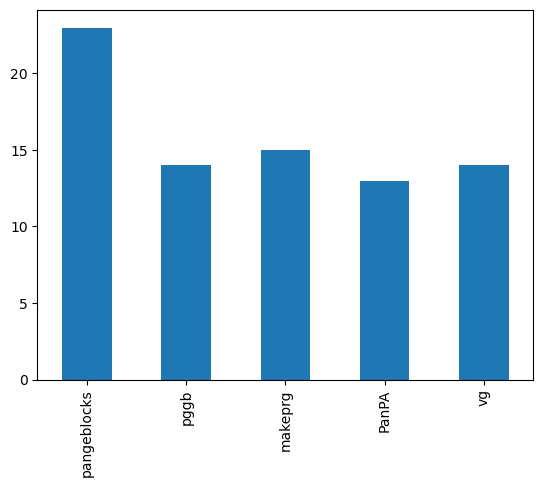

In [236]:
from collections import Counter, defaultdict
count_best_giraffe = defaultdict(int)

lbg = df_best_graphs.sort_values(by=["seqid","aligner"]).query("aligner=='giraffe'")["graphs"].tolist()

for lg in lbg: 
    for graph in lg:
        count_best_giraffe[graph] += 1

pd.Series(count_best_giraffe).plot(kind="bar")

In [235]:
count_best_graphaligner=defaultdict(int)
lbg = df_best_graphs.sort_values(by=["seqid","aligner"]).query("aligner=='graphaligner'")["graphs"].tolist()

for lg in lbg: 
    for graph in lg:
        count_best_graphaligner[graph] += 1

pd.Series(count_best_graphaligner).plot(kind="bar")

pangeblocks     6
makeprg         8
vg             11
PanPA           2
pggb            4
dtype: int64

In [ ]:
max_id_score.query(f"seqsid=='{seqid}' and aligner=='{aligner}'")["max"].item()

In [145]:
max_score = max_id_score.query(f"seqsid=='{seqsid}' and aligner=='{aligner}'").to_dict()["max"][0]

0.8511892797319948

In [ ]:

jaccard_index(set(readsid["pggb"]),set(readsid[top1]))

## "Best" graph for each gene 
where "best" correspond (in this case) to the graph with maximum number of reads aligned

In [ ]:
# seqsid = sorted(data_gafs["seqsid"].unique())
# counts_by_seqid = data_gafs.query(f"mapping_quality>{threshold_mapping_quality}").groupby(["seqsid","tool","id_plot"]).count()["query_seq_name"].copy()

In [ ]:
# best_graphs = []
# for seqid in seqsid:

#     idx_seqid = counts_by_seqid.index.isin([seqid], level=0)
#     multi_idx = counts_by_seqid[idx_seqid].idxmax()
#     maxvalue  = counts_by_seqid[idx_seqid][multi_idx]

#     best_graphs.append(
#         (multi_idx, maxvalue)
#     )


In [ ]:
# best_graphs = pd.Series(
#             [v[1] for v in best_graphs], 
#             index=pd.MultiIndex.from_tuples([v[0] for v in best_graphs])
#             ) 
            

In [ ]:
# best_graphs

In [ ]:
# pd.DataFrame(best_graphs.index.tolist(), columns=["seqid","tool","id_plot"]). \
#     groupby(["tool"]).size()


___
## Checking manually reads for gene C-3107
- Why pggb and vg align less reads than pangeblocks?
- get reads aligned by pangeblocks and not by pggb 
- get reads aligned by pangeblocks and not by vg


In [ ]:
""" seqid="C-3107"
TOOL="pggb"
with(open(BASEPATH_ALIGN.joinpath(TOOL) / "gfaid_to_paths.json" )) as fp: 
    gfaid_to_paths=json.load(fp)

path_gaf="/data/pangeblocks-experiments/alignment-simulated-reads-HLA-zoo/pggb/C-3107/C-3107.gfaid16.alignment.gaf"
path_gfa="../"+gfaid_to_paths["16"]

gaf_pggb = load_gaf(path_gaf=path_gaf, path_gfa=path_gfa)
gaf_pggb.shape """

' seqid="C-3107"\nTOOL="pggb"\nwith(open(BASEPATH_ALIGN.joinpath(TOOL) / "gfaid_to_paths.json" )) as fp: \n    gfaid_to_paths=json.load(fp)\n\npath_gaf="/data/pangeblocks-experiments/alignment-simulated-reads-HLA-zoo/pggb/C-3107/C-3107.gfaid16.alignment.gaf"\npath_gfa="../"+gfaid_to_paths["16"]\n\ngaf_pggb = load_gaf(path_gaf=path_gaf, path_gfa=path_gfa)\ngaf_pggb.shape '

In [ ]:
# sns.histplot(data=gaf_pggb,x="id")

In [ ]:
""" TOOL="vg"
with(open(BASEPATH_ALIGN.joinpath(TOOL) / "gfaid_to_paths.json" )) as fp: 
    gfaid_to_paths=json.load(fp)

path_gaf="/data/pangeblocks-experiments/alignment-simulated-reads-HLA-zoo/vg/C-3107/C-3107.gfaid24.alignment.gaf"
path_gfa="../" + gfaid_to_paths["24"]

gaf_vg=load_gaf(path_gaf=path_gaf, path_gfa=path_gfa)
gaf_vg.shape """

' TOOL="vg"\nwith(open(BASEPATH_ALIGN.joinpath(TOOL) / "gfaid_to_paths.json" )) as fp: \n    gfaid_to_paths=json.load(fp)\n\npath_gaf="/data/pangeblocks-experiments/alignment-simulated-reads-HLA-zoo/vg/C-3107/C-3107.gfaid24.alignment.gaf"\npath_gfa="../" + gfaid_to_paths["24"]\n\ngaf_vg=load_gaf(path_gaf=path_gaf, path_gfa=path_gfa)\ngaf_vg.shape '

In [ ]:
""" TOOL="pangeblocks"
with(open(BASEPATH_ALIGN.joinpath(TOOL) / "gfaid_to_paths.json" )) as fp: 
    gfaid_to_paths=json.load(fp)

path_gaf="/data/pangeblocks-experiments/alignment-simulated-reads-HLA-zoo/pangeblocks/C-3107/C-3107.gfaid537.alignment.gaf"
path_gfa="../" + gfaid_to_paths["537"]

gaf_pangeblocks=load_gaf(path_gaf=path_gaf, path_gfa=path_gfa)
gaf_pangeblocks.shape """

' TOOL="pangeblocks"\nwith(open(BASEPATH_ALIGN.joinpath(TOOL) / "gfaid_to_paths.json" )) as fp: \n    gfaid_to_paths=json.load(fp)\n\npath_gaf="/data/pangeblocks-experiments/alignment-simulated-reads-HLA-zoo/pangeblocks/C-3107/C-3107.gfaid537.alignment.gaf"\npath_gfa="../" + gfaid_to_paths["537"]\n\ngaf_pangeblocks=load_gaf(path_gaf=path_gaf, path_gfa=path_gfa)\ngaf_pangeblocks.shape '